In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


In [ ]:
dataset_url = '/content/drive/MyDrive/water_potability.csv'
data = pd.read_csv(dataset_url)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


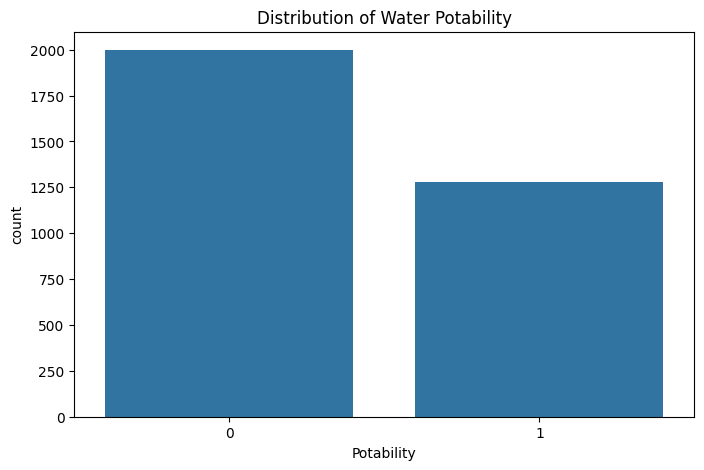

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Potability', data=data)
plt.title('Distribution of Water Potability')
plt.show()

In [ ]:
# Check and handiling missing values
print(data.isnull().sum())
data.fillna(data.median(), inplace=True)
print(data.isnull().sum())


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


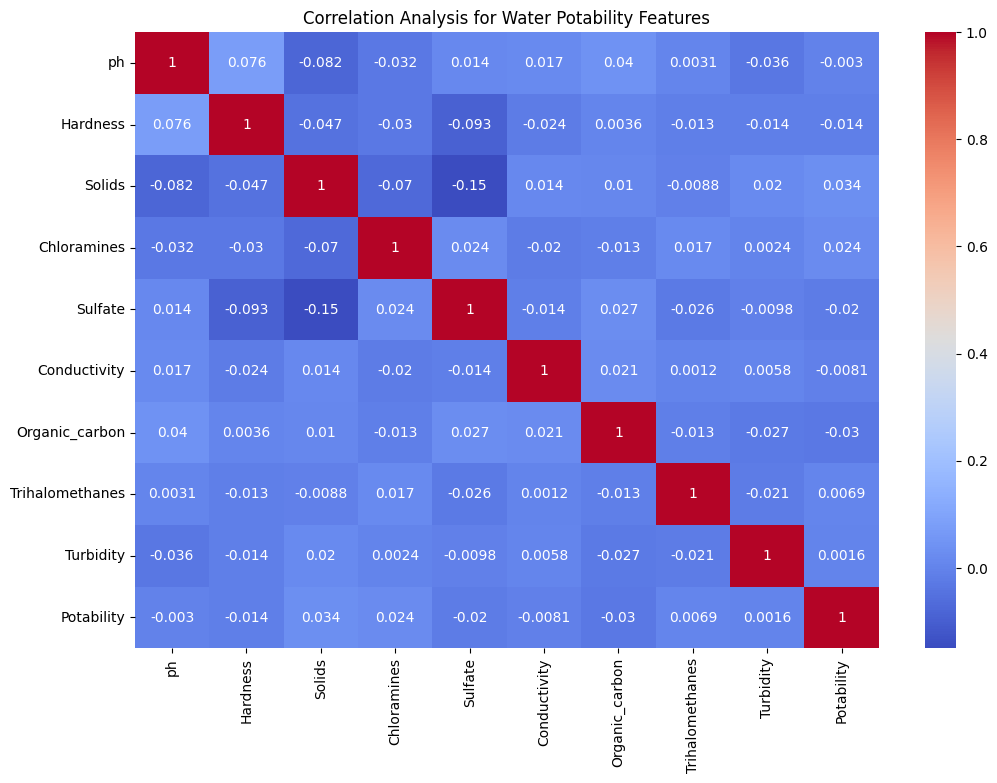

In [ ]:
# Correlation
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis for Water Potability Features')
plt.show()


In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X = data.drop('Potability', axis=1)
y = data['Potability']
X_scaled = scaler.fit_transform(X)
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [ ]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_scaled, y)

In [ ]:
#Split the Data into Training and Test
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [ ]:
#Define Hyperparameters and Grid Search
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
  }

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.7249726134585289


In [ ]:
optimized_rf_model = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
optimized_rf_model.fit(X_train_sm, y_train_sm)
y_pred_rf = optimized_rf_model.predict(X_test_sm)
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test_sm, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_sm, y_pred_rf))
print("Classification Report:\n", classification_report(y_test_sm, y_pred_rf))

Random Forest Performance:
Accuracy: 0.7375
Confusion Matrix:
 [[296  98]
 [112 294]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       394
           1       0.75      0.72      0.74       406

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



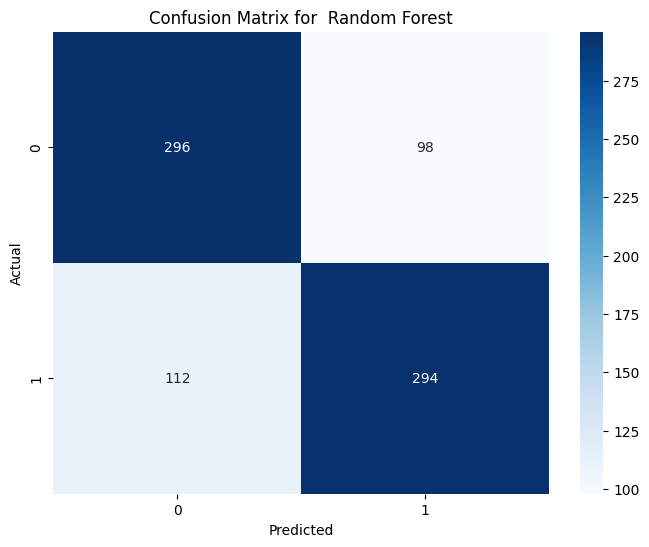

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_sm, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for  Random Forest')
plt.show()

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
param_grid_logreg = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
    'max_iter': [10000]
}

In [ ]:
grid_search_logreg = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_logreg,
    cv=5,
    scoring='accuracy',
    verbose=1
)

In [ ]:
grid_search_logreg.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [10000], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best Parameters:", grid_search_logreg.best_params_)
print("Best Score:", grid_search_logreg.best_score_)

Best Parameters: {'C': 0.012742749857031334, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.5109521713615024


In [ ]:
optimized_logreg_model = LogisticRegression(
    **grid_search_logreg.best_params_,
    random_state=42
)

In [ ]:
optimized_logreg_model.fit(X_train_sm, y_train_sm)

LogisticRegression(C=0.012742749857031334, max_iter=10000, random_state=42)

In [ ]:
y_pred_logreg_optimized = optimized_logreg_model.predict(X_test_sm)

In [ ]:
accuracy_logreg_optimized = accuracy_score(y_test_sm, y_pred_logreg_optimized)
confusion_matrix_logreg_optimized = confusion_matrix(y_test_sm, y_pred_logreg_optimized)
classification_report_logreg_optimized = classification_report(y_test_sm, y_pred_logreg_optimized)
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_logreg_optimized)
print("Confusion Matrix:\n", confusion_matrix_logreg_optimized)
print("Classification Report:\n", classification_report_logreg_optimized)

Logistic Regression Model Performance:
Accuracy: 0.51
Confusion Matrix:
 [[271 123]
 [269 137]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.69      0.58       394
           1       0.53      0.34      0.41       406

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.50       800
weighted avg       0.51      0.51      0.49       800



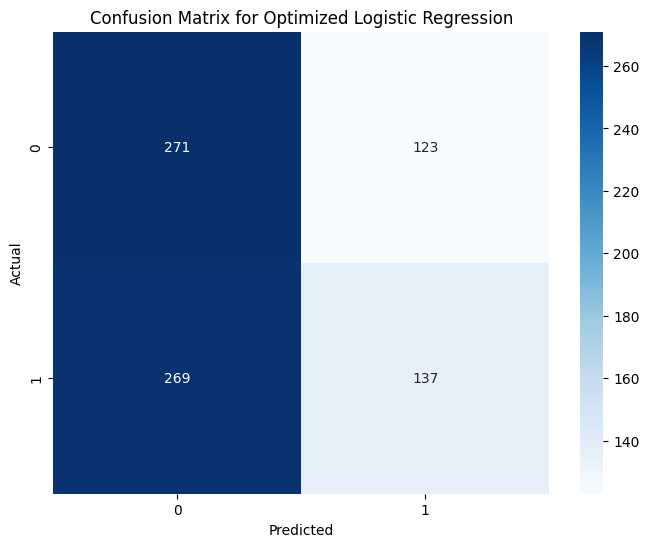

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_logreg_optimized, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Optimized Logistic Regression')
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [ ]:
grid_search_svm = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid_svm,
    cv=5,
    scoring='accuracy',
    verbose=1
)


In [ ]:
grid_search_svm.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Score for SVM:", grid_search_svm.best_score_)

Best Parameters for SVM: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Score for SVM: 0.6501868153364633


In [ ]:
optimized_svm_model = SVC(
    **grid_search_svm.best_params_,
    random_state=42
)


In [ ]:
optimized_svm_model.fit(X_train_sm, y_train_sm)

SVC(C=100, gamma=1, random_state=42)

In [ ]:
y_pred_svm = optimized_svm_model.predict(X_test_sm)

In [ ]:
accuracy_svm = accuracy_score(y_test_sm, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test_sm, y_pred_svm)
classification_report_svm = classification_report(y_test_sm, y_pred_svm)
print("SVM Model Performance:")
print("Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", confusion_matrix_svm)
print("Classification Report:\n", classification_report_svm)

SVM Model Performance:
Accuracy: 0.6475
Confusion Matrix:
 [[253 141]
 [141 265]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64       394
           1       0.65      0.65      0.65       406

    accuracy                           0.65       800
   macro avg       0.65      0.65      0.65       800
weighted avg       0.65      0.65      0.65       800



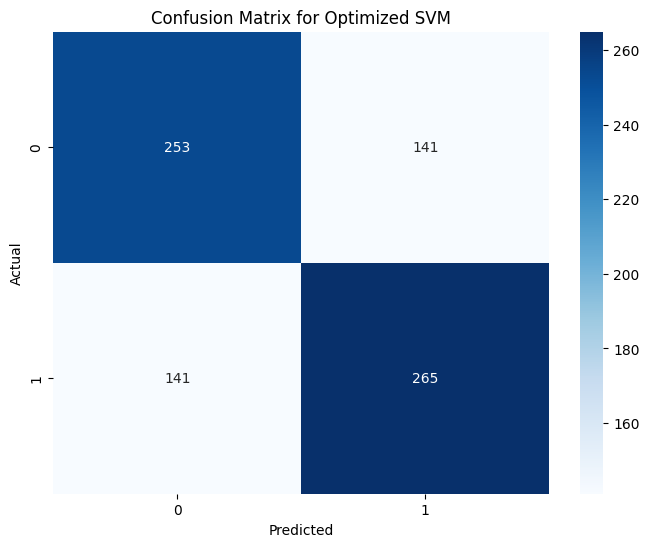

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Optimized SVM')
plt.show()

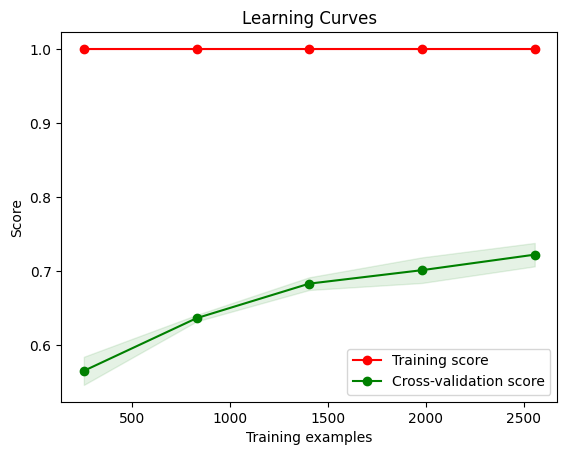

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    optimized_rf_model, X_train_sm, y_train_sm, cv=5, n_jobs=-1,
    train_sizes=np.linspace(.1, 1.0, 5), scoring="accuracy"
)
# Calculate mean and standard deviation for train/test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the learning curves
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


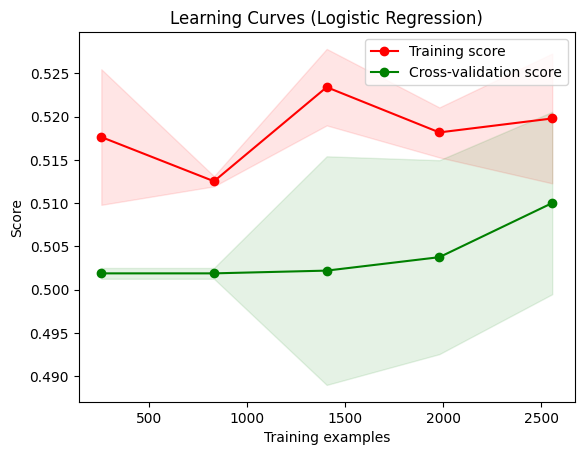

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt



def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring="accuracy"
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.show()

# Plot learning curve for the Logistic Regression model
plot_learning_curve(optimized_logreg_model, X_train_sm, y_train_sm, "Learning Curves (Logistic Regression)")


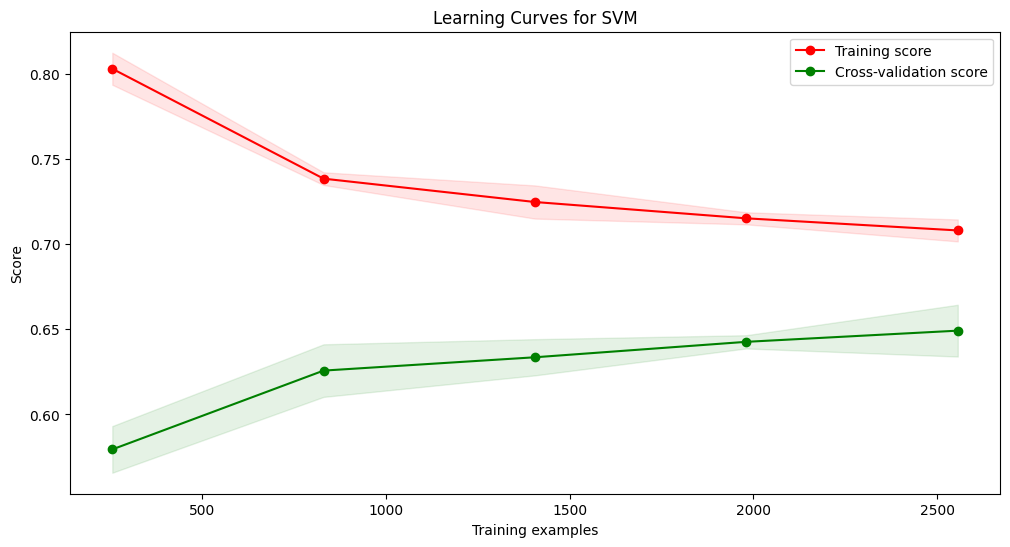

In [ ]:
# Plot learning curve for SVM
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(
    optimized_svm_model,
    X_train_sm, y_train_sm,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(.1, 1.0, 5),
    scoring="accuracy"
)

train_mean_svm = np.mean(train_scores_svm, axis=1)
train_std_svm = np.std(train_scores_svm, axis=1)
test_mean_svm = np.mean(test_scores_svm, axis=1)
test_std_svm = np.std(test_scores_svm, axis=1)

plt.figure(figsize=(12, 6))
plt.fill_between(train_sizes_svm, train_mean_svm - train_std_svm, train_mean_svm + train_std_svm, alpha=0.1, color="r")
plt.fill_between(train_sizes_svm, test_mean_svm - test_std_svm, test_mean_svm + test_std_svm, alpha=0.1, color="g")
plt.plot(train_sizes_svm, train_mean_svm, 'o-', color="r", label="Training score")
plt.plot(train_sizes_svm, test_mean_svm, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves for SVM")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()
